**Course:** Machine Learning by Dr. Seyyed Salehi

**Homework:** HW3

**Name:** Mohammad Mohammadi

**Student ID:** 402208592

# Question 1
We discussed the use of SVM in the class for classification. Now, I intend to extend this concept to regression. For this purpose, I proceed step by step as follows. Suppose your data consists of $(x^{(1)}, y^{(1)})...(x^{(n)}, y^{(n)})$ where $x^{(i)}∈R^d$ and $𝑦^{(𝑖)}∈𝑅$. A typical loss function for this purpose is defined as

$$L_\epsilon(x, y, f) = |y - f(x)|_\epsilon = \max \{0, |y - f(x)| - \epsilon \}$$

Using this, the cost function is as follows:

$$\frac{1}{2} \| w \|^2 + C \sum_{i=1}^n L_\epsilon(x^{(i)}, y^{(i)}, f)$$


(a) By defining the slack variable $(ξ_i^∗ ,ξ_i)$ and applying suitable conditions on them, show the primal form of this problem (which is a quadratic problem) as follows:

$$\min_{w \in \mathbb{R}^m, \xi_i \in \mathbb{R}^n, \xi^* \in \mathbb{R}^n} \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n (\xi_i^* + \xi_i)$$

Hint: As you know, in soft margin SVM, the variable $ξ_i$ indicates the amount of margin violation. In this problem, $ξ_i$ is related to the amount of being larger than $y_i$ and $ξ_i^*$ is related to the amount of being smaller from $y_i$.

(b) First, write the Lagrangian results for the primal form, then by substituting min and max and using the K.K.T conditions, reach the dual form as follows:

$$\max_{\alpha \in \mathbb{R}^n, \alpha^* \in \mathbb{R}^n} -\frac{1}{2} \sum_{i,j=1}^n (\alpha_i - \alpha_i^*) (\alpha_j - \alpha_j^*) (x_i, x_j) - \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*) + \sum_{i=1}^n y_i (\alpha_i - \alpha_i^*)$$

With the condition:

$$\alpha_i, \alpha_i^* \in [0, C]$$

(c) Explain if the problem is solvable in dual form with a quadratic optimization solver?

(d) How are the support vectors determined in this problem?

(e) Write a new relationship for prediction and explain if kernel techniques can be used?

(f) How does changing $ϵ$ cause a change? How about changing $C$?

## Answer 1



### Part (a)

Since $f(x)=w⋅x+b$, we substitute this into the loss function:

$$L_\epsilon(x^{(i)}, y^{(i)}, f) = \max \{0, |y^{(i)} - (w \cdot x^{(i)} + b)| - \epsilon \}$$

We define slack variables $(ξ_i^∗ ,ξ_i)$ to handle the ε-insensitive margin as below:
*   $ξ_i$ measures the amount by which $y^{(i)}$ exceeds $w⋅x^{(i)}+b+ϵ$
*   $ξ_i^*$ measures the amount by which $w⋅x^{(i)}+b+ϵ$ exceeds $y^{(i)}$

Hence, the constraints become:

$$\begin{cases}
y^{(i)} - (w \cdot x^{(i)} + b) \leq \epsilon + \xi_i \\
(w \cdot x^{(i)} + b) - y^{(i)} \leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0
\end{cases}$$

Incorporating the slack variables, the primal problem becomes:

$$\min_{w, b, \xi, \xi^*} \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*)$$
With subject to the condtitions below:

$$\begin{cases}
y^{(i)} - w \cdot x^{(i)} - b \leq \epsilon + \xi_i \\
w \cdot x^{(i)} + b - y^{(i)} \leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0
\end{cases}$$

### Part (b)

The Lagrangian L for the primal problem would be as:

$$\begin{align*}
{L}(w, b, \xi, \xi^*, \alpha, \alpha^*, \eta, \eta^*) = & \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \\
& - \sum_{i=1}^n \alpha_i (\epsilon + \xi_i - y^{(i)} + w \cdot x^{(i)} + b) \\
& - \sum_{i=1}^n \alpha_i^* (\epsilon + \xi_i^* - w \cdot x^{(i)} - b + y^{(i)}) \\
& - \sum_{i=1}^n \eta_i \xi_i - \sum_{i=1}^n \eta_i^* \xi_i^*
\end{align*}$$
Where, $
𝛼_𝑖, 𝛼_𝑖^∗, 𝜂_i,𝜂_i^*$ are Lagrange multipliers.

We derive the conditions for optimality by setting the partial derivatives of L with respect to $w, b, ξ, ξ^*$ to zero:

Derivative w.r.t w:

$$\frac{\partial L}{\partial w} = w - \sum_{i=1}^n \alpha_i x^{(i)} + \sum_{i=1}^n \alpha_i^* x^{(i)} = 0 \implies w = \sum_{i=1}^n (\alpha_i - \alpha_i^*) x^{(i)}$$

Derivative w.r.t b:

$$\frac{\partial L}{\partial b} = \sum_{i=1}^n (\alpha_i - \alpha_i^*) = 0$$

Derivative w.r.t $ξ_i$:

$$\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \eta_i = 0 \implies \alpha_i \leq C$$

Derivative w.r.t $ξ_i^*$:

$$\frac{\partial L}{\partial \xi_i^*} = C - \alpha_i^* - \eta_i^* = 0 \implies \alpha_i^* \leq C$$

If we substitute the values back into the Lagrangian we will have the Lagrangian L above.

By simplifying and applying the KKT conditions, we can obtain the dual problem as below:

$$\max_{\alpha, \alpha^*} -\frac{1}{2} \sum_{i,j=1}^n (\alpha_i - \alpha_i^*) (\alpha_j - \alpha_j^*) (x_i, x_j) - \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*) + \sum_{i=1}^n y_i (\alpha_i - \alpha_i^*)$$

with subject to:

$$\alpha_i, \alpha_i^* \in [0, C]$$

### Part (c)

Yes, the problem can be solved in the dual form using a quadratic optimization solver since it is a quadratic programming problem with linear constraints.

### Part (d)

Support vectors are the data points for which $𝛼_i$ or $𝛼_i^*$ are non-zero. These are the points lying on or outside the ε-insensitive tube.

### Part (e)


The prediction function is:

$$f(x) = w \cdot x + b = \sum_{i=1}^n (\alpha_i - \alpha_i^*) (x^{(i)} \cdot x) + b$$

Kkernel techniques can be used by replacing the dot product $x^{(i)}.x$ with a kernel function $K(x^{(i)}, x)$. The prediction function becomes:

$$f(x) = \sum_{i=1}^n (\alpha_i - \alpha_i^*) K(x^{(i)}, x) + b$$

### Part (f)

Changing ϵ:
*   Increase of ϵ widens the ε-insensitive tube, reducing the number of support vectors and making the model less sensitive to small fluctuations (more robust to noise probably).
*   Decrease of ϵ narrows the tube, increasing the number of support vectors and making the model more sensitive to small fluctuations.

Changing C:
*   Increase of C penalizes the slack variables more, leading to a smaller margin and potentially overfitting.
*   Decrease of C reduces the penalty on slack variables, leading to a larger margin and potentially underfitting.

# Question 2
Determine the minimum number of samples
m required to ensure that the learned hypothesis h has an error rate of less than 5% in unseen data with at least 95% confidence, assuming a given hypothesis set H that completely describes the concept, (As an example, exists a hypothesis in hypothesis set H that describes the target concept fully).

Given data:

$$
|H| = 1000
$$
$$
\epsilon = 0.05
$$
$$
\delta = 0.05
$$

## Answer


To determine the minimum number of samples \( m \) required to ensure that the learned hypothesis \( h \) has an error rate of less than \( 5\% \) (i.e., \( $\epsilon$ = 0.05 \)) in unseen data with at least \( 95\% \) confidence (i.e., \( 1 - $\delta$ = 0.95 \), so \( $\delta$ = 0.05 \)), given a hypothesis set \( H \) of size \( |H| = 1000 \), we can use the concept of the **VC dimension** and bounds from statistical learning theory, specifically the **Hoeffding Inequality** and the **Union Bound**.



1. **Hoeffding Inequality**:

$$
P(|\text{err}(h) - \hat{\text{err}}(h)| > \epsilon) \leq 2 \exp(-2\epsilon^2 m)
$$

2. **Union Bound**:

$$
P(\exists h \in H : |\text{err}(h) - \hat{\text{err}}(h)| > \epsilon) \leq |H| \cdot P(|\text{err}(h) - \hat{\text{err}}(h)| > \epsilon)
$$

We want this to be less than \( $\delta$ = 0.05 \):

$$
1000 \cdot 2 \exp(-2\epsilon^2 m) \leq 0.05
$$

3. **Finding \( m \)**:

$$
2000 \exp(-2 \epsilon^2 m) \leq 0.05
$$

$$
\exp(-2 \epsilon^2 m) \leq \frac{0.05}{2000}
$$

$$
\exp(-2 \epsilon^2 m) \leq 2.5 \times 10^{-5}
$$

Applying Ln on both sides:

$$
-2 \epsilon^2 m \leq \ln(2.5 \times 10^{-5})
$$

$\ln(2.5 \times 10^{-5}) $:

$$
\ln(2.5 \times 10^{-5}) \approx -10.5966
$$

Substituting Ln and $\epsilon = 0.05$:

$$
-2 (0.05)^2 m \leq -10.5966
$$

$$
-2 \times 0.0025 m \leq -10.5966
$$

$$
-0.005 m \leq -10.5966
$$

$$
m \geq \frac{10.5966}{0.005}
$$

$$
m \geq 2119.32
$$

Since \( m \) must be an integer, we round up to the nearest whole number:

$$
m \geq 2120
$$


The minimum number of samples \( m \) required is 2120.



# Quesion 3
(a) Consider a neural network with input x. Perform the following computations for the output layer based on x.

$$z = wx + b$$
$$y = \sigma(z)$$
$$L = \frac{1}{2}(y - t)^2$$
$$R = \frac{1}{2}w^2$$
$$L_{\text{reg}} = L + \lambda R$$

Plot the computational graph of this problem and update the derivatives of $L_{\text{reg}}$.

(b) Parameters of a neural network are initially assignedd with small and random values. Explain what issues might arise if these two conditions are not complied.

(c) Assign random desired values to the the weights of the neural network obtained from the first part. And considering the derivatives obtained in the first part, for a desired input x, update the weights of the network using gradient descent with a learning rate of 0.1 and 1 epoch.

## Answer

### Part (a)

Derivatives:

Derivative of L w.r.t y:

$$\frac{\partial L}{\partial y} = y - t$$

Derivative of y w.r.t z:

$$\frac{\partial y}{\partial z} = y(1 - y)$$

Derivative of z w.r.t w adn b:

$$\frac{\partial z}{\partial w} = x, \quad \frac{\partial z}{\partial b} = 1$$

Derivative of R w.r.t w:

$$\frac{\partial R}{\partial w} = w$$

Derivative of $L_{reg}$ w.r.t w:

$$\frac{\partial L_{\text{reg}}}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w} + \lambda \frac{\partial R}{\partial w}$$

$$\frac{\partial L_{\text{reg}}}{\partial w} = (y - t) \cdot y(1 - y) \cdot x + \lambda w$$

Derivative of $L_{reg}$ w.r.t b:

$$\frac{\partial L_{\text{reg}}}{\partial b} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial b}$$

$$\frac{\partial L_{\text{reg}}}{\partial b} = (y - t) \cdot y(1 - y)$$



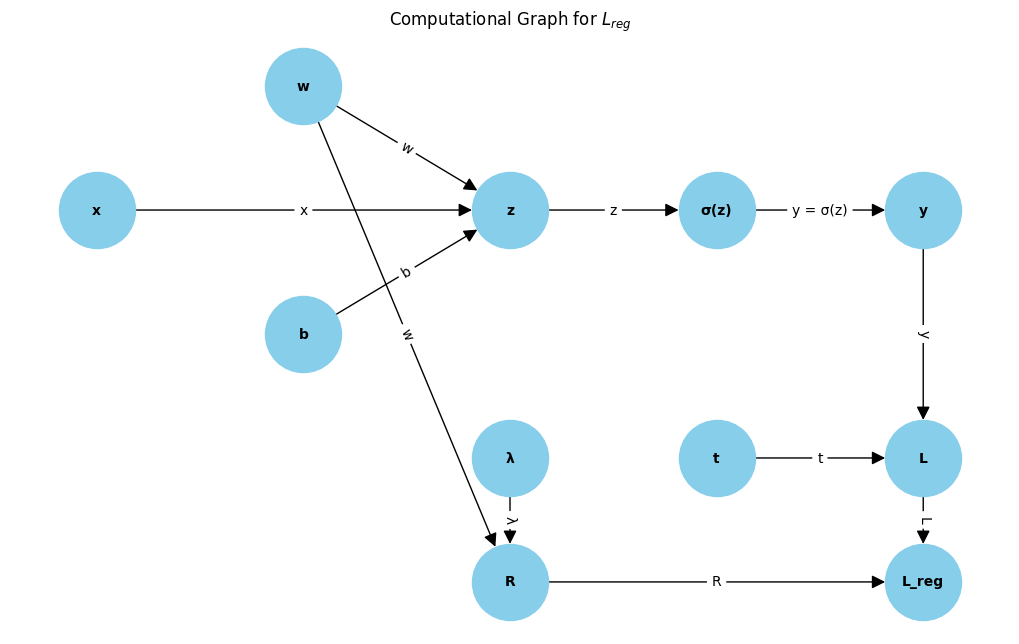

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

G = nx.DiGraph()

nodes = {
    'x': (0, 2),
    'w': (2, 3),
    'b': (2, 1),
    'z': (4, 2),
    'σ(z)': (6, 2),
    'y': (8, 2),
    't': (6, 0),
    'L': (8, 0),
    'λ': (4, 0),
    'R': (4, -1),
    'L_reg': (8, -1)
}
G.add_nodes_from(nodes)

edges = [
    ('x', 'z', 'x'),
    ('w', 'z', 'w'),
    ('b', 'z', 'b'),
    ('z', 'σ(z)', 'z'),
    ('σ(z)', 'y', 'y = σ(z)'),
    ('y', 'L', 'y'),
    ('t', 'L', 't'),
    ('λ', 'R', 'λ'),
    ('w', 'R', 'w'),
    ('R', 'L_reg', 'R'),
    ('L', 'L_reg', 'L')
]
G.add_weighted_edges_from([(u, v, 0) for u, v, _ in edges])

pos = nodes

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)

edge_labels = {(u, v): label for u, v, label in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Computational Graph for $L_{reg}$")
plt.show()


Input Nodes:

*   x: Input feature.
*   w: Weight.
*   b: Bias.
*   t: Target value.
*   λ: Regularization parameter.

Intermediate Nodes:
*   z: Result of the linear transformation $z=wx+b$.
*   $σ(z)$: Sigmoid activation function applied to z.
*   y: Output of the activation function.
*   L: Loss function $L= \frac{1}{2} (y-t)^2$.
*   R: Regularization term $R= \frac{1}{2} (w)^2$.
*   $L_{reg}$: Regularized loss $L_{reg}=L+λR$.

Edges:
*   Each edge is labeled with the computation or the flow of data.
*   The flow starts from the inputs x, w, b and passes through transformations and calculations to produce the final regularized loss $L_{reg}$.

### Part (b)

1.  Non-random Initialization:
    *   If weights are initialized to zeros or some constant value, all neurons might update in the same way during training, leading to symmetry and poor learning.
    *   Non-random initialization can prevent the network from learning effectively as it reduces the diversity of the weights, leading to similar gradients and no variation in learning.
2.  Large Initial Weights:
    *   Large weights can cause the outputs of neurons to be pushed into the saturated regions of the activation functions (e.g., sigmoid), leading to vanishing gradients and slow learning.
    *   Large weights might also lead to numerical instability during backpropagation, especially in deeper networks.

### Part (c)

Assume we have:

*   Initial random weights $w_0$

*   Initial random bias $b_0$

*   Learning rate $η=0.1$

*   Input x

*   Target t


FOr the inference we have:
*   $ z = w_0 x + b_0 $
*   $y = \sigma(z) = \frac{1}{1 + e^{-z}}$

For loss and regularized loss we have:
*   $L = \frac{1}{2}(y - t)^2$
*   $R = \frac{1}{2}w_0^2$
*   $_{\text{reg}} = L + \lambda R$

Gradient w.r.t w:
$$\frac{\partial L_{\text{reg}}}{\partial w} = (y - t) \cdot y(1 - y) \cdot x + \lambda w_0$$

Gradient w.r.t b:
$$\frac{\partial L_{\text{reg}}}{\partial b} = (y - t) \cdot y(1 - y)$$

Weight update:
$$w_1 = w_0 - \eta \frac{\partial L_{\text{reg}}}{\partial w}$$

Bias update:
$$b_1 = b_0 - \eta \frac{\partial L_{\text{reg}}}{\partial b}$$




#### Numerical example

Value assignment:
*   $x = 0.5$
*   $t = 0.8$
*   $\lambda = 0.01$
*   $w_0 = 0.1$
*   $b_0 = 0.1$

Inference forward pass functions:
*   $z = 0.1 \cdot 0.5 + 0.1 = 0.15$
*   $y = \sigma(0.15) \approx 0.5374$

Loss and regularized loss functions:
*   $L = \frac{1}{2}(0.5374 - 0.8)^2 \approx 0.0345$
*   $R = \frac{1}{2}(0.1)^2 = 0.005$
*   $L_{\text{reg}} = 0.0345 + 0.01 \cdot 0.005 = 0.03455$

Gradient:
*   $\frac{\partial L_{\text{reg}}}{\partial w} = (0.5374 - 0.8) \cdot 0.5374 \cdot (1 - 0.5374) \cdot 0.5 + 0.01 \cdot 0.1$
*   $\frac{\partial L_{\text{reg}}}{\partial w} \approx -0.0654$
*   $\frac{\partial L_{\text{reg}}}{\partial b} = (0.5374 - 0.8) \cdot 0.5374 \cdot (1 - 0.5374)$
*   $\frac{\partial L_{\text{reg}}}{\partial b} \approx -0.1309$

Weigth and bias update:
*   $w_1 = 0.1 - 0.1 \cdot (-0.0654) = 0.10654$
*   $b_1 = 0.1 - 0.1 \cdot (-0.1309) = 0.11309$